In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn import svm
import matplotlib 
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df=pd.read_csv('Loan Prediction.csv')

In [37]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,8.674026,0.0,4.986426,5.886104,1.0,2,1
1,LP001003,1,1,1,1,0,8.430109,1508.0,4.852030,5.886104,1.0,0,0
2,LP001005,1,1,0,1,1,8.006368,0.0,4.189655,5.886104,1.0,2,1
3,LP001006,1,1,0,0,0,7.856707,2358.0,4.787492,5.886104,1.0,2,1
4,LP001008,1,0,0,1,0,8.699515,0.0,4.948760,5.886104,1.0,2,1


In [40]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,8.341213,1621.245798,4.862066,5.802065,0.842199,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.340446,0.645263,2926.248369,0.496575,0.312482,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,5.010635,0.000000,2.197225,2.484907,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,7.964677,0.000000,4.607658,5.886104,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,8.246040,1188.500000,4.859812,5.886104,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,8.664750,2297.250000,5.104426,5.886104,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,11.302204,41667.000000,6.551080,6.173786,1.000000,2.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#first taking care of numeric value="Eleminating null values from numeric columns"
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
#filling missing values of categorical data
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory data analysis

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

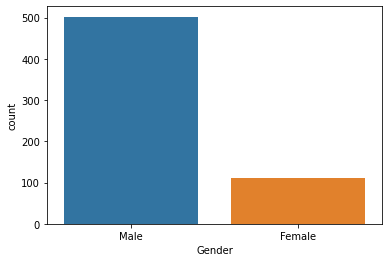

In [10]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

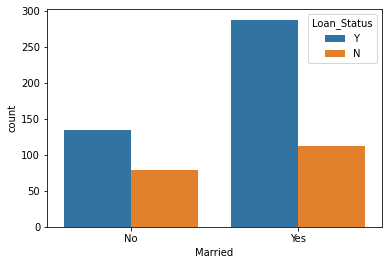

In [11]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

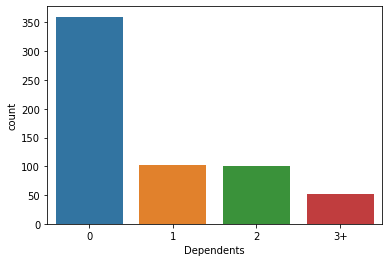

In [12]:
sns.countplot(df['Dependents'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

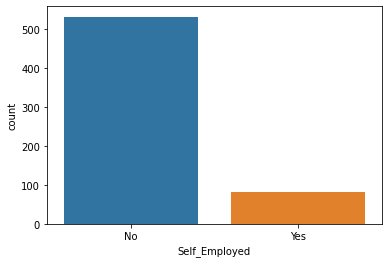

In [13]:
sns.countplot(df['Self_Employed'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

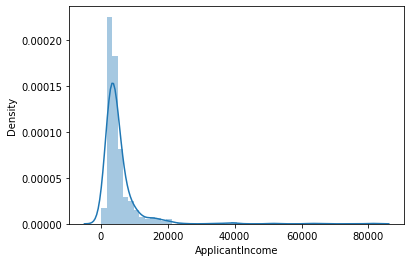

In [14]:
#Visualizing NUmerical data
sns.distplot(df["ApplicantIncome"])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

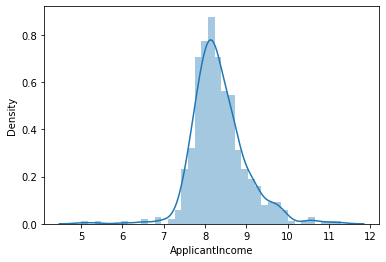

In [15]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

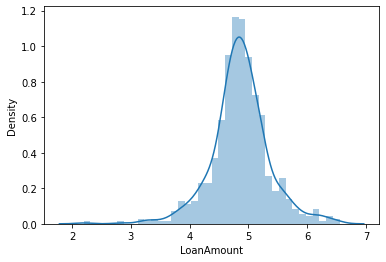

In [16]:
df['LoanAmount']=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

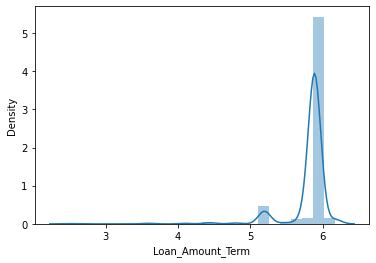

In [17]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y


<AxesSubplot:>

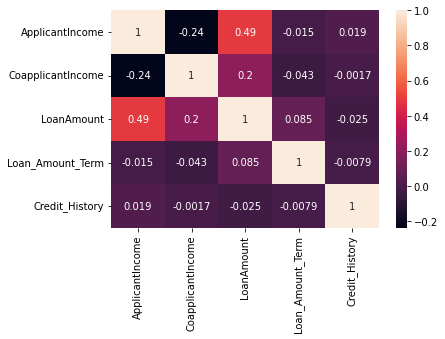

In [19]:
corr=df.corr()
sns.heatmap(corr, annot=True )

In [20]:
df.replace({"Loan_Status":{'N':0,'Y':1}}, inplace =True)

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,1


In [22]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
#replacing the value of 3+ to 4
df=df.replace(to_replace='3+', value=4)

In [24]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [25]:
#convert catagorical value to numerical value
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,8.674026,0.0,4.986426,5.886104,1.0,2,1
1,LP001003,1,1,1,1,0,8.430109,1508.0,4.852030,5.886104,1.0,0,0
2,LP001005,1,1,0,1,1,8.006368,0.0,4.189655,5.886104,1.0,2,1
3,LP001006,1,1,0,0,0,7.856707,2358.0,4.787492,5.886104,1.0,2,1
4,LP001008,1,0,0,1,0,8.699515,0.0,4.948760,5.886104,1.0,2,1


In [27]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [28]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0         8.674026   
1         1        1          1          1              0         8.430109   
2         1        1          0          1              1         8.006368   
3         1        1          0          0              0         7.856707   
4         1        0          0          1              0         8.699515   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0         7.972466   
610       1        1          4          1              0         8.320205   
611       1        1          1          1              0         8.996157   
612       1        1          2          1              0         8.933664   
613       0        0          0          1              1         8.430109   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


# Training our data using SVM

In [41]:
classifier = svm.SVC(kernel='linear')

In [42]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [43]:
#accuracy in trainning dataset
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [44]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8061594202898551


In [46]:
#accuracy in testing data set
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [47]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7741935483870968
